Maze
====
MI-PYT Hw_7

In [3]:
! python -m pip -q install --upgrade pip
! python -m pip -q install numpy matplotlib

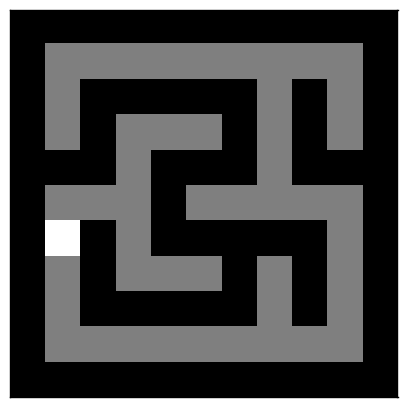

In [6]:
import numpy
#from numpy.random import random_integers as rand
import random
import matplotlib.pyplot as pyplot

def maze(width=81, height=51, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    Z = numpy.zeros(shape)
    # Fill borders
    Z[0, :] = Z[-1, :] = -1
    Z[:, 0] = Z[:, -1] = -1
    
    # Make aisles
    for i in range(density):
        x, y = random.randint(0, shape[1] // 2) * 2, random.randint(0, shape[0] // 2) * 2
        Z[y, x] = -1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[random.randint(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = -1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = -1
                    x, y = x_, y_
    
    # Make start point
    #x, y = random.randint(0, shape[1] // 2) * 2, random.randint(0, shape[0] // 2) * 2
    x, y = random.choice( numpy.column_stack(numpy.where(Z == 0)) ) 
    Z[x,y] = 1
    
    return Z

def print_maze( Z ):
    pyplot.figure(figsize=(10, 5))
    pyplot.imshow( -Z, cmap=pyplot.cm.binary, interpolation='nearest')
    pyplot.xticks([]), pyplot.yticks([])
    pyplot.show()

Z = maze(10,10,1,1)    
print_maze( Z )

In [76]:
import queue 

class Solved_maze:
    
    def __init__(self, array):
        
        sx, sy = array.shape
        #create frame
        self.__a = numpy.full( (sx+2, sy+2), -1, dtype=int )
        
        #copy data
        self.__a[1:-1,1:-1] = array 
        
        start_point = numpy.where(self.__a == 1)
        
        self.distances  = numpy.full( self.__a.shape, -1, dtype=int )
        self.directions = numpy.full( self.__a.shape, b'#', dtype=('a',1))
        
        self.__bfs( start_point )
        
        #destroy frame
        self.distances = self.distances[1:-1,1:-1]
        self.directions = self.directions[1:-1,1:-1]
        
        self.is_reachable =  len( self.__a[ self.__a >= 0 ] ) == 0
    
    
    def __update_queue( self, q, point , ch, time ):
        if self.__a[point] >= 0:
            q.put( ( time , point ) )
            self.directions[ point ] = ch
            self.distances[ point ] = time
            self.__a[ point ] = -1 #visited
            
    def __bfs( self, point ):
 
        q = queue.PriorityQueue()
        self.__update_queue(q, point, b'X', 0 )
                
        while not q.empty():
            time , ( x , y ) = q.get()
            self.__update_queue( q, (x-1, y), b'v', time + 1 )
            self.__update_queue( q, (x+1, y), b'^', time + 1 )
            self.__update_queue( q, (x, y-1), b'>', time + 1 )
            self.__update_queue( q, (x, y+1), b'<', time + 1 )
            
    def __move_step( self, ch , x, y ):
        
        if ch == b'v': return (x+1, y)
        if ch == b'^': return (x-1, y)
        if ch == b'>': return (x, y+1)
        if ch == b'<': return (x, y-1)
        raise Exception("Wrong move")
    
    def path(self, *point ):
        
        print( type(point) )
        
        if self.directions[point] == b'#':  raise Exception("Unreachable point")
        p = []
        
        while True:
            
            p.append( point )
            ch = self.directions[point]
            if ch == b'X': break;
            point = self.__move_step( ch, *point )
        
        return p
                        
def analyze(array):
    return Solved_maze( array )
    

    

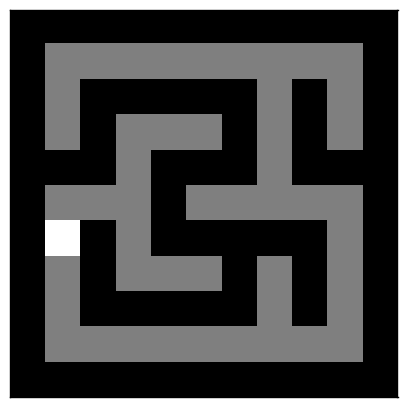

True


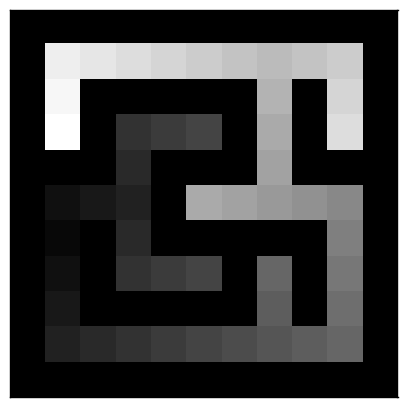

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 27 26 25 24 23 22 21 22 23 -1]
 [-1 28 -1 -1 -1 -1 -1 20 -1 24 -1]
 [-1 29 -1  5  6  7 -1 19 -1 25 -1]
 [-1 -1 -1  4 -1 -1 -1 18 -1 -1 -1]
 [-1  1  2  3 -1 19 18 17 16 15 -1]
 [-1  0 -1  4 -1 -1 -1 -1 -1 14 -1]
 [-1  1 -1  5  6  7 -1 11 -1 13 -1]
 [-1  2 -1 -1 -1 -1 -1 10 -1 12 -1]
 [-1  3  4  5  6  7  8  9 10 11 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
[[b'#' b'#' b'#' b'#' b'#' b'#' b'#' b'#' b'#' b'#' b'#']
 [b'#' b'>' b'>' b'>' b'>' b'>' b'>' b'v' b'<' b'<' b'#']
 [b'#' b'^' b'#' b'#' b'#' b'#' b'#' b'v' b'#' b'^' b'#']
 [b'#' b'^' b'#' b'v' b'<' b'<' b'#' b'v' b'#' b'^' b'#']
 [b'#' b'#' b'#' b'v' b'#' b'#' b'#' b'v' b'#' b'#' b'#']
 [b'#' b'v' b'<' b'<' b'#' b'>' b'>' b'>' b'>' b'v' b'#']
 [b'#' b'X' b'#' b'^' b'#' b'#' b'#' b'#' b'#' b'v' b'#']
 [b'#' b'^' b'#' b'^' b'<' b'<' b'#' b'v' b'#' b'v' b'#']
 [b'#' b'^' b'#' b'#' b'#' b'#' b'#' b'v' b'#' b'v' b'#']
 [b'#' b'^' b'<' b'<' b'<' b'<' b'<' b'<' b'<' b'<' b'#']
 [b'#' b'#' b'#' b'#' b

In [77]:
px, py = numpy.where(Z == 1)
#Z[:,25] = -1

print_maze(Z)

sol = analyze( Z )
print(sol.is_reachable)
print_maze( sol.distances )
print(sol.distances)
print(sol.directions)

In [80]:
sol.path(6,1)

<class 'tuple'>


[(6, 1)]

In [51]:
a


(2, 5)

In [53]:
a + (1,1)

(2, 5, 1, 1)